# Autoencoder-LSTM Performance Analysis

## Notebook Overview 
This notebook is dedicated to the evaluation of an LSTM Autoencoder model, trained according to the _evaluate_autoencoders_ notebook available in the project.

### Imports
This section imports essential libraries used throughout the notebook and adds the 'src' directory to the system path to allow importing modules from the source folder. 

In [1]:
import pandas as pd
import numpy as np
import sys
import os
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

from dl_models import AutoencoderLSTM as ael
from dl_models import AutoencoderLSTMKfold as aelk
from utils import plots as plt

## Introductory test
Following the baseline Autoencoder test on Building 1 (see first notebook), we now adopt an Autoencoder-LSTM to exploit the sequential nature of the data. The model encodes input sequences into a latent vector, which is then repeated and decoded to reconstruct the time series, enabling the capture of temporal dependencies

In [2]:
# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Concatenate multiple datasets along the columns to create a single dataset.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

In [3]:
# Target features to forecast
targets = ['cooling_demand', 'carbon_intensity', 'solar_generation']

# List of features used for training the autoencoder.
features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'cooling_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

In [4]:
real_1, pred_1, _ = ael.Autoencoder(dataframe=df, features=features, epochs = 150, batch_size = 32, latent_dim = 64, timesteps = 6)

Epoch 1/150
16/16 [==============================] - 3s 36ms/step - loss: 0.1669
Epoch 2/150
16/16 [==============================] - 1s 35ms/step - loss: 0.0956
Epoch 3/150
16/16 [==============================] - 0s 26ms/step - loss: 0.0708
Epoch 4/150
16/16 [==============================] - 1s 38ms/step - loss: 0.0624
Epoch 5/150
16/16 [==============================] - 1s 40ms/step - loss: 0.0565
Epoch 6/150
16/16 [==============================] - 1s 40ms/step - loss: 0.0540
Epoch 7/150
16/16 [==============================] - 1s 33ms/step - loss: 0.0529
Epoch 8/150
16/16 [==============================] - 1s 36ms/step - loss: 0.0523
Epoch 9/150
16/16 [==============================] - 1s 35ms/step - loss: 0.0519
Epoch 10/150
16/16 [==============================] - 1s 40ms/step - loss: 0.0516
Epoch 11/150
16/16 [==============================] - 1s 39ms/step - loss: 0.0512
Epoch 12/150
16/16 [==============================] - 1s 33ms/step - loss: 0.0508
Epoch 13/150
16/16 [=====

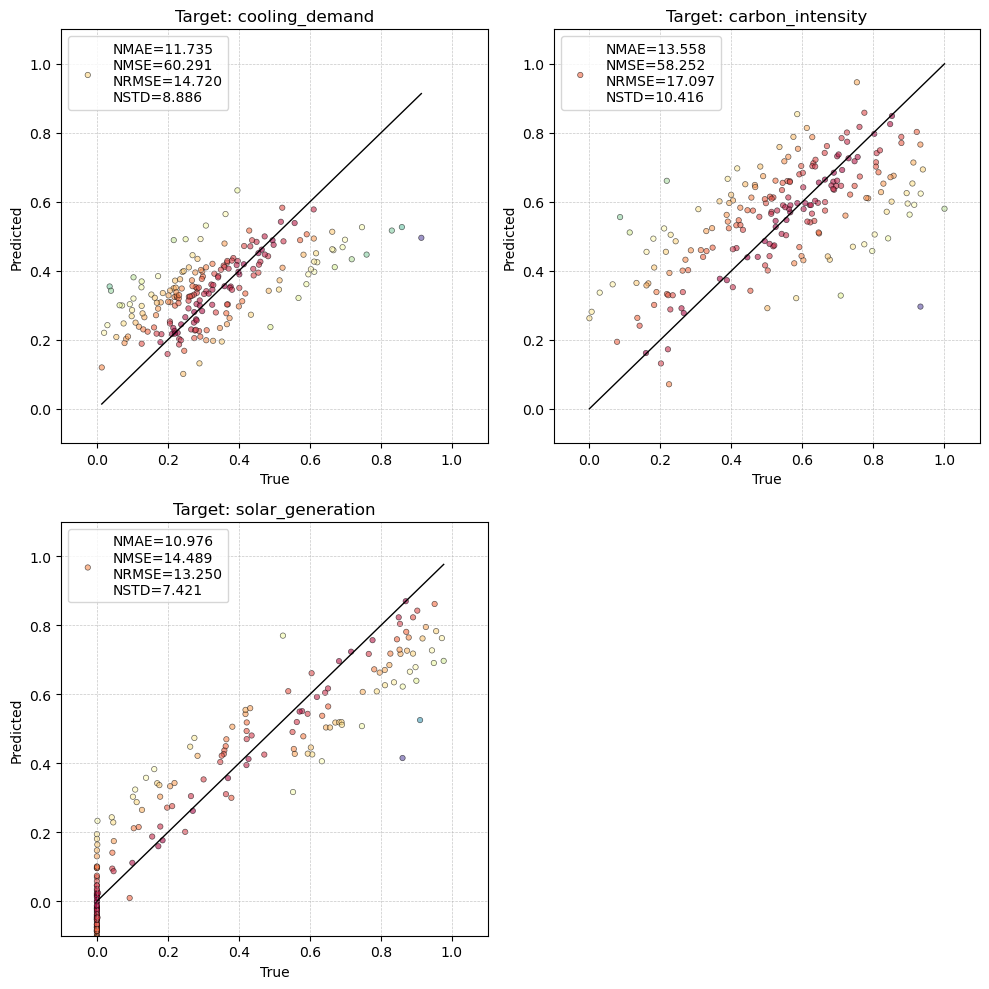

In [5]:
plt.plot_aelstm_targets(real_1, pred_1, targets, features, percent=True)

## Cross-Building Test
The targets and the model remain unchanged. For this phase, we will use 100% of the data from Building 1 for training, while the remaining two buildings, being triplets with the first, will be used to evaluate the model's performance.

In [6]:
## Time series data for all buildings
building_1_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")
building_2_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_2.csv")
building_3_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_3.csv")

# Concatenate train and test data
train_df = pd.concat([building_1_data, carbon_data, pricing_data, weather_data], axis=1)

# Concatenate the data from Building 2 and Building 3 vertically, creating a unified dataset for evaluation
building_2_3_data = pd.concat([building_2_data, building_3_data], axis=0, ignore_index=True)

# Combine carbon intensity, pricing, and weather data horizontally to align with building data
external_data = pd.concat([carbon_data, pricing_data, weather_data], axis=1)

# Repeat the external data (carbon, pricing, weather) to match the number of rows in Building 2 and 3 data
external_data_repeated = pd.concat([external_data] * 2, axis=0, ignore_index=True)

# Combine the building data and the repeated external data horizontally, preparing the final test dataset
test_df = pd.concat([building_2_3_data, external_data_repeated], axis=1)

In [7]:
real_2, pred_2, model = ael.Autoencoder(train_df=train_df, test_df=test_df, features=features, epochs = 150, batch_size = 32, latent_dim = 64, timesteps = 6)
model.save(os.path.join("..", "reports", "models", "autoencoderLSTM_generalization.h5"))

Epoch 1/150
23/23 [==============================] - 2s 42ms/step - loss: 0.1349
Epoch 2/150
23/23 [==============================] - 1s 39ms/step - loss: 0.0637
Epoch 3/150
23/23 [==============================] - 1s 36ms/step - loss: 0.0403
Epoch 4/150
23/23 [==============================] - 1s 33ms/step - loss: 0.0294
Epoch 5/150
23/23 [==============================] - 1s 35ms/step - loss: 0.0240
Epoch 6/150
23/23 [==============================] - 1s 36ms/step - loss: 0.0209
Epoch 7/150
23/23 [==============================] - 1s 33ms/step - loss: 0.0190
Epoch 8/150
23/23 [==============================] - 1s 34ms/step - loss: 0.0177
Epoch 9/150
23/23 [==============================] - 1s 33ms/step - loss: 0.0168
Epoch 10/150
23/23 [==============================] - 1s 38ms/step - loss: 0.0160
Epoch 11/150
23/23 [==============================] - 1s 32ms/step - loss: 0.0153
Epoch 12/150
23/23 [==============================] - 1s 31ms/step - loss: 0.0147
Epoch 13/150
23/23 [=====

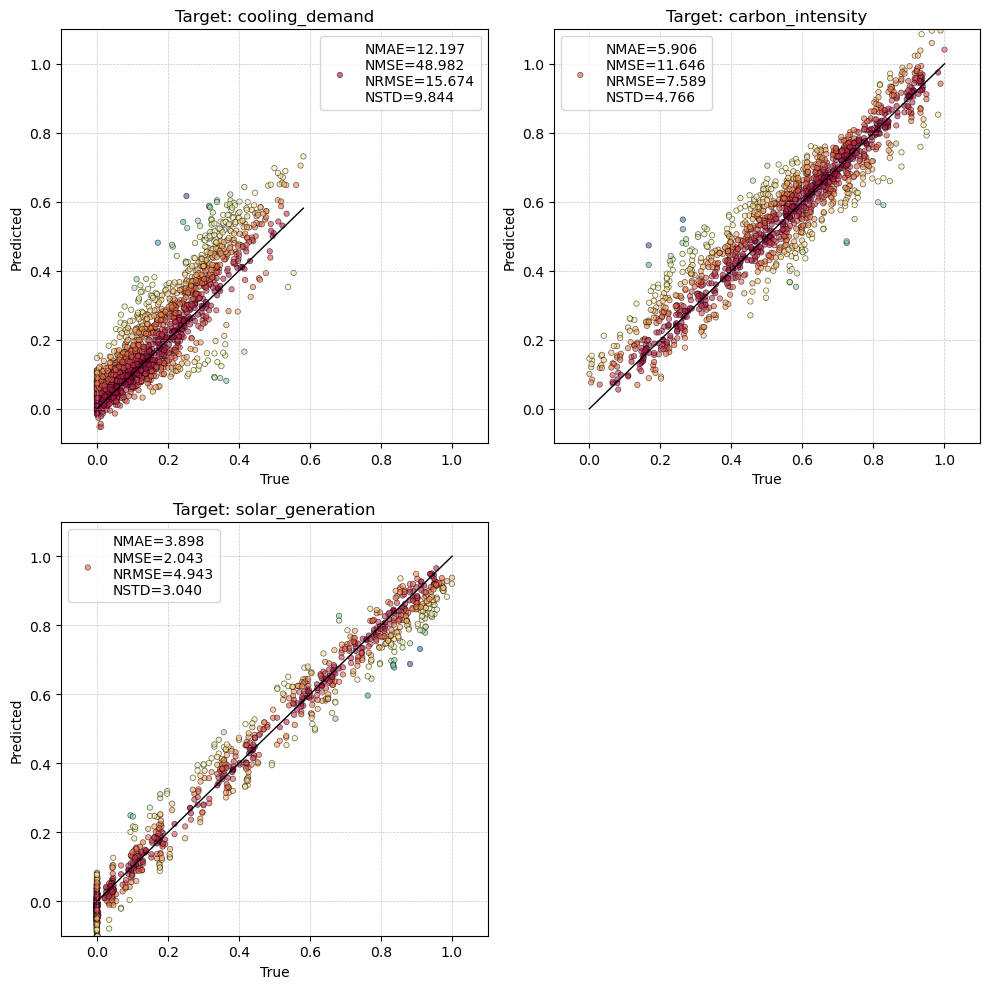

In [8]:
plt.plot_aelstm_targets(real_2, pred_2, targets, features, percent=True)

## With K-fold Cross Validation
To ensure a more robust and unbiased evaluation of the LSTM autoencoder's performance, a K-Fold Cross-Validation approach is adopted.

### Tuning

In [9]:
electricity_d = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_2.csv")
df2 = pd.concat([electricity_d, carbon_data, pricing_data, weather_data], axis=1)

In [10]:
real_3, pred_3, model = aelk.Autoencoder(dataframe = df2, features = features, epochs = 75, batch_size = 32, latent_dim = 64, timesteps = 6, kfold = 5)
model.save(os.path.join("..", "reports", "models", "autoencoderLSTM_kfoldtuning.h5"))


Fold 1/5
Epoch 1/75
18/18 [==============================] - 2s 35ms/step - loss: 0.1450
Epoch 2/75
18/18 [==============================] - 1s 35ms/step - loss: 0.0740
Epoch 3/75
18/18 [==============================] - 1s 37ms/step - loss: 0.0525
Epoch 4/75
18/18 [==============================] - 1s 34ms/step - loss: 0.0382
Epoch 5/75
18/18 [==============================] - 1s 35ms/step - loss: 0.0311
Epoch 6/75
18/18 [==============================] - 1s 36ms/step - loss: 0.0272
Epoch 7/75
18/18 [==============================] - 1s 35ms/step - loss: 0.0244
Epoch 8/75
18/18 [==============================] - 1s 38ms/step - loss: 0.0223
Epoch 9/75
18/18 [==============================] - 1s 36ms/step - loss: 0.0210
Epoch 10/75
18/18 [==============================] - 1s 35ms/step - loss: 0.0199
Epoch 11/75
18/18 [==============================] - 1s 39ms/step - loss: 0.0190
Epoch 12/75
18/18 [==============================] - 1s 32ms/step - loss: 0.0183
Epoch 13/75
18/18 [========

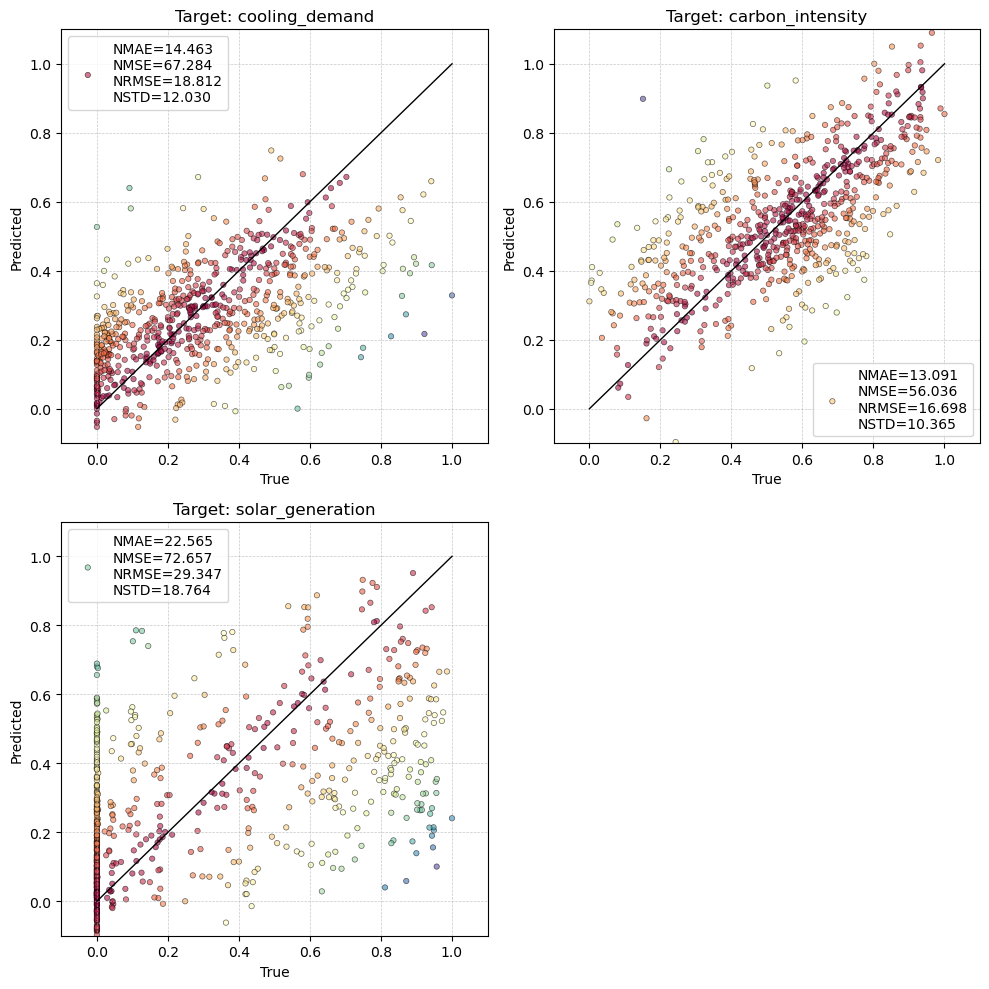

In [11]:
plt.plot_aelstm_targets(real_3, pred_3, targets, features, percent=True)

### Final Training

In [12]:
electricity_d = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_3.csv")
df3 = pd.concat([electricity_d, carbon_data, pricing_data, weather_data], axis=1)

In [15]:
real_4, pred_4, model = aelk.Autoencoder(dataframe=df3, features=features, epochs = 300, batch_size = 32, latent_dim = 64, timesteps = 6)
model.save(os.path.join("..", "reports", "models", "autoencoderLSTM_kfoldtrain.h5"))

Epoch 1/300
16/16 [==============================] - 2s 37ms/step - loss: 0.1731
Epoch 2/300
16/16 [==============================] - 1s 36ms/step - loss: 0.0931
Epoch 3/300
16/16 [==============================] - 1s 40ms/step - loss: 0.0706
Epoch 4/300
16/16 [==============================] - 1s 37ms/step - loss: 0.0620
Epoch 5/300
16/16 [==============================] - 1s 31ms/step - loss: 0.0580
Epoch 6/300
16/16 [==============================] - 1s 37ms/step - loss: 0.0565
Epoch 7/300
16/16 [==============================] - 1s 43ms/step - loss: 0.0555
Epoch 8/300
16/16 [==============================] - 1s 39ms/step - loss: 0.0547
Epoch 9/300
16/16 [==============================] - 1s 38ms/step - loss: 0.0542
Epoch 10/300
16/16 [==============================] - 1s 35ms/step - loss: 0.0538
Epoch 11/300
16/16 [==============================] - 1s 38ms/step - loss: 0.0533
Epoch 12/300
16/16 [==============================] - 1s 36ms/step - loss: 0.0530
Epoch 13/300
16/16 [=====

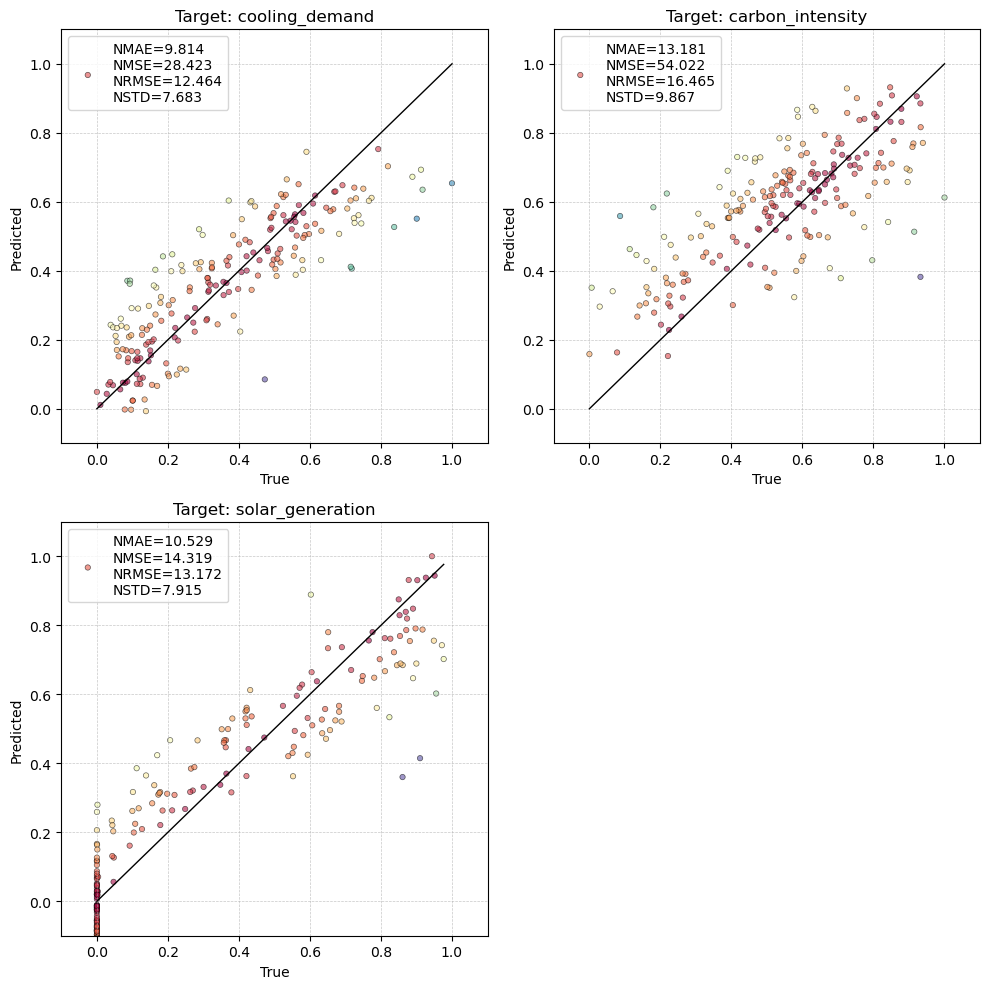

In [14]:
plt.plot_aelstm_targets(real_4, pred_4, targets, features, percent=True)